# Task 7 - Stock Market Prediction using Numerical and Tecxtual Analysis

# TSF-GRIP Internship

# Data Science & Business Analytics Tasks¶

# Level : Advanced

# Submitted by : Mohd Tarique Khan

# Date : 07/08/2021

# Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 
# Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
# Data used:  for historical stock prices from finance.yahoo.com
# Data used:  for textual (news) data from https://bit.ly/36fFPI6


In [1]:
# Import Liabraries

# To ignore warnings during the session
import warnings
warnings.filterwarnings('ignore') 

# Importing essential liabraries
import pandas as pd
import numpy as np

# Importing Data Visualization Liabraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Downloading Historical Stock Prices from Yahoo Finance

In [2]:
# Importing required libraries
import time
import datetime

In [3]:
# Creating Variables, we can create data file for many companies but here i will take Microsoft only for assessment 
# # tickers = ['MSFT', 'GOOG', 'AAPL', RELIANCE.NS] # For downloading Multiple Companies data from Yahoo Finance
tickers = ['RELIANCE.NS']
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016,8,10,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2020,12,31,23,59).timetuple()))
print(period1)
print(period2)

1470862740
1609448340


In [4]:
xlwriter = pd.ExcelWriter('Historical_Stock_Prices.xlsx', engine='openpyxl')

for ticker in tickers:
    query_string =f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
#                   https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true
    df = pd.read_csv(query_string)
    df.to_excel(xlwriter, sheet_name=ticker, index=False)
    

# xlwriter.save() # For saving an excel file
df.to_csv('Historical_Stock_Prices_csv.csv', index=False) # For saving a csv file

In [5]:
# reading the datasets into pandas

stock_price = pd.read_csv('C:/Users/IT/TSF GRIP/TSF-GRIP-DSBA-Internship/Historical_Stock_Prices_csv.csv')

In [6]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-11,496.270844,506.622711,495.106873,502.288818,489.428925,6539201.0
1,2016-08-12,503.725189,516.553589,503.725189,513.036926,499.901855,7552641.0
2,2016-08-16,513.259827,517.494690,502.982239,507.638092,494.641266,6169134.0
3,2016-08-17,507.241852,509.569794,498.871185,501.892548,489.042816,7147050.0
4,2016-08-18,503.229889,507.018982,503.229889,504.245270,491.335297,3576481.0


# Loading already downloaded Times of India News Headlines from Harvard Dataverse

In [7]:
news_headlines = pd.read_csv('india-news-headlines.csv')

In [8]:
news_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [9]:
news_headlines.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


# Data Visualization & Cleaning

# Stock Price Data

In [10]:
# checking for null values in both the datasets
stock_price.isna().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [11]:
news_headlines.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [12]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1083 non-null   object 
 1   Open       1081 non-null   float64
 2   High       1081 non-null   float64
 3   Low        1081 non-null   float64
 4   Close      1081 non-null   float64
 5   Adj Close  1081 non-null   float64
 6   Volume     1081 non-null   float64
dtypes: float64(6), object(1)
memory usage: 59.4+ KB


In [13]:
news_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [14]:
# coverting the "Date' column datatype from 'object' to 'datetime'
stock_price['Date'] = pd.to_datetime(stock_price['Date']).dt.normalize()

# filtering the important columns required
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

# setting column 'Date' as the index column
stock_price.set_index('Date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Close,Open,High,Low,Volume
Date,,,,,
2016-08-11,502.288818,496.270844,506.622711,495.106873,6539201.0
2016-08-12,513.036926,503.725189,516.553589,503.725189,7552641.0
2016-08-16,507.638092,513.259827,517.494690,502.982239,6169134.0
2016-08-17,501.892548,507.241852,509.569794,498.871185,7147050.0
2016-08-18,504.245270,503.229889,507.018982,503.229889,3576481.0
...,...,...,...,...,...
2020-12-24,1994.150024,1947.000000,1998.800049,1945.900024,9588577.0
2020-12-28,2003.300049,2006.699951,2018.000000,1995.300049,7947719.0
2020-12-29,1990.050049,2009.000000,2012.300049,1982.550049,8589407.0


In [15]:
df1= stock_price[['Close']]

In [16]:
df1.head()

,Close
Date,
2016-08-11,502.288818
2016-08-12,513.036926
2016-08-16,507.638092
2016-08-17,501.892548
2016-08-18,504.245270


Text(0, 0.5, 'Price')

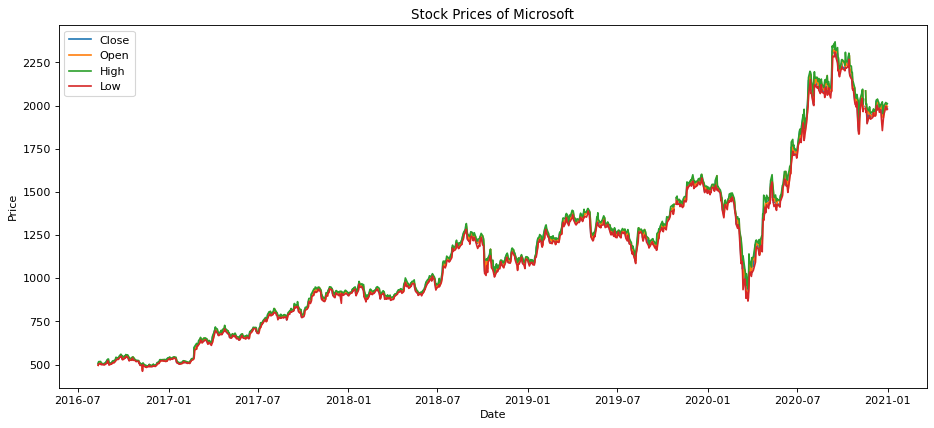

In [17]:
from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=80)
plt.plot(stock_price["Close"], label="Close")
plt.plot(stock_price["Open"], label="Open")
plt.plot(stock_price["High"], label="High")
plt.plot(stock_price["Low"], label="Low")

plt.legend()
plt.title("Stock Prices of Microsoft")
plt.xlabel("Date")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

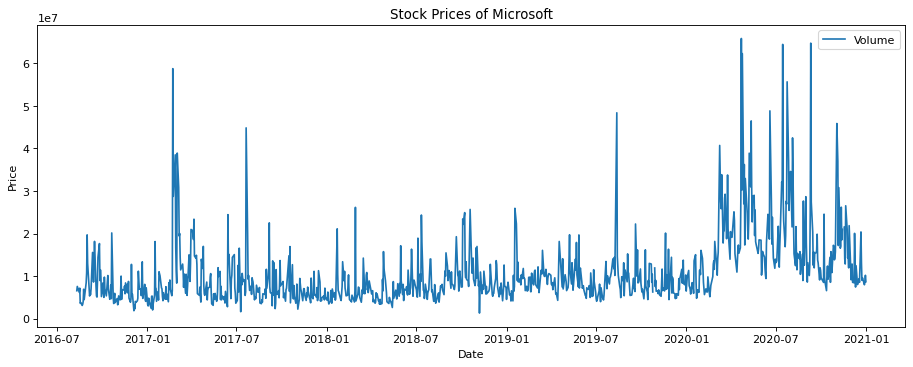

In [18]:
figure(figsize=(14, 5), dpi=80)
plt.plot(stock_price["Volume"], label="Volume")

plt.legend()
plt.title("Stock Prices of Microsoft")
plt.xlabel("Date")
plt.ylabel("Price")

# News Data

In [19]:
# coverting the "Date' column datatype from 'object' to 'datetime'
news_headlines['publish_date'] = news_headlines['publish_date'].astype(str)
news_headlines['publish_date'] = news_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
news_headlines['publish_date'] = pd.to_datetime(news_headlines['publish_date']).dt.normalize()

# filtering the important columns required
news_headlines = news_headlines.filter(['publish_date', 'headline_text'])

# grouping the news headlines according to 'Date'
news_headlines = news_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting column 'Date' as the index column
news_headlines.set_index('publish_date', inplace= True)

# sorting the data according to the index i.e 'Date'
news_headlines = news_headlines.sort_index(ascending=True, axis=0)
news_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


# Concatenating(combining) both Stock Price and News data

In [20]:
# concatenating the datasets stock_price and news_headlines
concat_data = pd.concat([stock_price, news_headlines], axis=1)

# dropping the null values if any
concat_data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
concat_data

,Close,Open,High,Low,Volume,headline_text
2016-08-11,502.288818,496.270844,506.622711,495.106873,6539201.0,Watch: Pooja Hegde recreates Hrithik Roshan's ...
2016-08-12,513.036926,503.725189,516.553589,503.725189,7552641.0,"Bomb scare at west Delhi Metro station,Mobile ..."
2016-08-16,507.638092,513.259827,517.494690,502.982239,6169134.0,"Gnocchi: The delightful dumplings,5 delicious ..."
2016-08-17,501.892548,507.241852,509.569794,498.871185,7147050.0,"Vicky Kaushal: Lesser known facts,Withold 20% ..."
2016-08-18,504.245270,503.229889,507.018982,503.229889,3576481.0,Rakshabandhan Special: Bollywood brother-siste...
...,...,...,...,...,...,...
2020-12-24,1994.150024,1947.000000,1998.800049,1945.900024,9588577.0,How to set the mood for sex during cold winter...
2020-12-28,2003.300049,2006.699951,2018.000000,1995.300049,7947719.0,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,1990.050049,2009.000000,2012.300049,1982.550049,8589407.0,Man recovers charred remains of 'thief' from h...
2020-12-30,1995.500000,1995.250000,2007.199951,1975.550049,10173132.0,Numerology Readings 30 December 2020: Predicti...


# Adding Columns for Sentiment scoring

In [21]:
# adding columns to concat_data
concat_data['Compound'] = ''
concat_data['Negative'] = ''
concat_data['Neutral'] = ''
concat_data['Positive'] = ''
concat_data.head()

,Close,Open,High,Low,Volume,headline_text,Compound,Negative,Neutral,Positive
2016-08-11,502.288818,496.270844,506.622711,495.106873,6539201.0,Watch: Pooja Hegde recreates Hrithik Roshan's ...,,,,
2016-08-12,513.036926,503.725189,516.553589,503.725189,7552641.0,"Bomb scare at west Delhi Metro station,Mobile ...",,,,
2016-08-16,507.638092,513.259827,517.494690,502.982239,6169134.0,"Gnocchi: The delightful dumplings,5 delicious ...",,,,
2016-08-17,501.892548,507.241852,509.569794,498.871185,7147050.0,"Vicky Kaushal: Lesser known facts,Withold 20% ...",,,,
2016-08-18,504.245270,503.229889,507.018982,503.229889,3576481.0,Rakshabandhan Special: Bollywood brother-siste...,,,,


In [22]:
# Importing Libraries for developing Sentiment Analysis
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
# nltk.download('vader_lexicon')


In [23]:
# instantiating the Sentiment Analyzer
s_analyzer = SentimentIntensityAnalyzer()

# calculating sentiment scores
concat_data['Compound'] = concat_data['headline_text'].apply(lambda x: s_analyzer.polarity_scores(x)['compound'])
concat_data['Negative'] = concat_data['headline_text'].apply(lambda x: s_analyzer.polarity_scores(x)['neg'])
concat_data['Neutral'] = concat_data['headline_text'].apply(lambda x: s_analyzer.polarity_scores(x)['neu'])
concat_data['Positive'] = concat_data['headline_text'].apply(lambda x: s_analyzer.polarity_scores(x)['pos'])

# displaying the stock data
concat_data.head()

,Close,Open,High,Low,Volume,headline_text,Compound,Negative,Neutral,Positive
2016-08-11,502.288818,496.270844,506.622711,495.106873,6539201.0,Watch: Pooja Hegde recreates Hrithik Roshan's ...,-0.9999,0.159,0.750,0.091
2016-08-12,513.036926,503.725189,516.553589,503.725189,7552641.0,"Bomb scare at west Delhi Metro station,Mobile ...",-0.9999,0.138,0.779,0.083
2016-08-16,507.638092,513.259827,517.494690,502.982239,6169134.0,"Gnocchi: The delightful dumplings,5 delicious ...",-0.9511,0.117,0.764,0.119
2016-08-17,501.892548,507.241852,509.569794,498.871185,7147050.0,"Vicky Kaushal: Lesser known facts,Withold 20% ...",-0.9999,0.147,0.759,0.094
2016-08-18,504.245270,503.229889,507.018982,503.229889,3576481.0,Rakshabandhan Special: Bollywood brother-siste...,-0.9990,0.142,0.734,0.125


In [24]:
concat_data.shape

(1081, 10)

# Preparing concatenated data for analysis and saving it

In [25]:
# dropping the 'headline_text' which is now not required
concat_data.drop(['headline_text'], inplace=True, axis=1)

# rearranging the columns of the whole concat_data
concat_data = concat_data[['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High', 'Low', 'Volume']]

concat_data.head()

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
2016-08-11,502.288818,-0.9999,0.159,0.750,0.091,496.270844,506.622711,495.106873,6539201.0
2016-08-12,513.036926,-0.9999,0.138,0.779,0.083,503.725189,516.553589,503.725189,7552641.0
2016-08-16,507.638092,-0.9511,0.117,0.764,0.119,513.259827,517.494690,502.982239,6169134.0
2016-08-17,501.892548,-0.9999,0.147,0.759,0.094,507.241852,509.569794,498.871185,7147050.0
2016-08-18,504.245270,-0.9990,0.142,0.734,0.125,503.229889,507.018982,503.229889,3576481.0


In [26]:
# Saving concat_data as stockdata_final csv file
concat_data.to_csv('Final_stock_data.csv')

# Opening the "Final_stock_data.csv" as DataFrame

In [27]:
fsdata = pd.read_csv('Final_stock_data.csv')
fsdata.head()

,Unnamed: 0,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
0,2016-08-11,502.288818,-0.9999,0.159,0.750,0.091,496.270844,506.622711,495.106873,6539201.0
1,2016-08-12,513.036926,-0.9999,0.138,0.779,0.083,503.725189,516.553589,503.725189,7552641.0
2,2016-08-16,507.638092,-0.9511,0.117,0.764,0.119,513.259827,517.494690,502.982239,6169134.0
3,2016-08-17,501.892548,-0.9999,0.147,0.759,0.094,507.241852,509.569794,498.871185,7147050.0
4,2016-08-18,504.245270,-0.9990,0.142,0.734,0.125,503.229889,507.018982,503.229889,3576481.0


In [28]:
# renaming the index column
fsdata.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
fsdata.set_index('Date', inplace = True)


In [29]:
fsdata.head()

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
Date,,,,,,,,,
2016-08-11,502.288818,-0.9999,0.159,0.750,0.091,496.270844,506.622711,495.106873,6539201.0
2016-08-12,513.036926,-0.9999,0.138,0.779,0.083,503.725189,516.553589,503.725189,7552641.0
2016-08-16,507.638092,-0.9511,0.117,0.764,0.119,513.259827,517.494690,502.982239,6169134.0
2016-08-17,501.892548,-0.9999,0.147,0.759,0.094,507.241852,509.569794,498.871185,7147050.0
2016-08-18,504.245270,-0.9990,0.142,0.734,0.125,503.229889,507.018982,503.229889,3576481.0


In [30]:
fsdata.shape

(1081, 9)

In [31]:
fsdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081 entries, 2016-08-11 to 2020-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1081 non-null   float64
 1   Compound  1081 non-null   float64
 2   Negative  1081 non-null   float64
 3   Neutral   1081 non-null   float64
 4   Positive  1081 non-null   float64
 5   Open      1081 non-null   float64
 6   High      1081 non-null   float64
 7   Low       1081 non-null   float64
 8   Volume    1081 non-null   float64
dtypes: float64(9)
memory usage: 84.5+ KB


In [32]:
fsdata.describe()

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
count,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1.081000e+03
mean,1143.425064,-0.979221,0.133335,0.781732,0.084934,1144.553183,1158.242249,1129.895129,1.059065e+07
std,454.456311,0.194421,0.017276,0.022553,0.013185,456.220901,461.834555,448.404941,7.916529e+06
min,484.284454,-1.000000,0.072000,0.728000,0.046000,470.539764,491.689270,460.633667,1.296168e+06
25%,811.161011,-0.999900,0.123000,0.765000,0.077000,813.984253,819.283997,804.474365,5.854289e+06
50%,1100.518188,-0.999800,0.134000,0.779000,0.084000,1099.676147,1118.398682,1090.661621,8.186126e+06
75%,1373.233154,-0.999700,0.144000,0.794000,0.092000,1366.051147,1385.863403,1353.420898,1.255695e+07
max,2324.550049,0.999600,0.199000,0.867000,0.128000,2325.000000,2369.350098,2310.550049,6.584835e+07


Text(0, 0.5, 'Price')

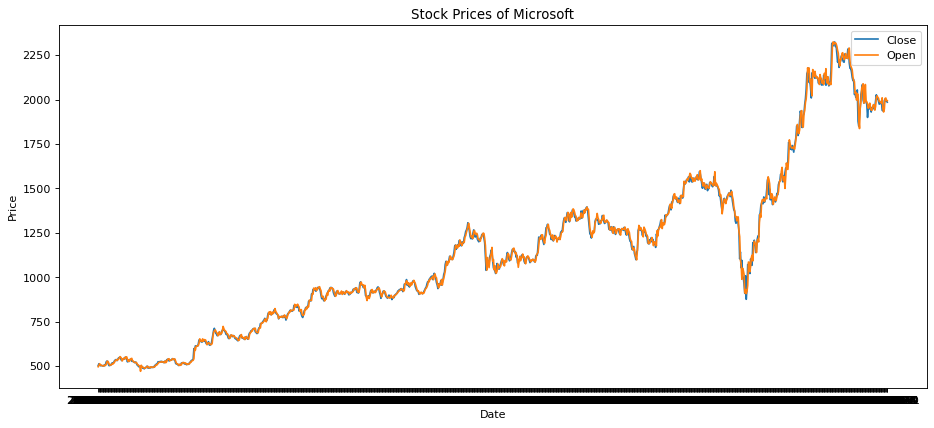

In [33]:
figure(figsize=(14, 6), dpi=80)
plt.plot(fsdata["Close"], label="Close")
plt.plot(fsdata["Open"], label="Open")

plt.legend()
plt.title("Stock Prices of Microsoft")
plt.xlabel("Date")
plt.ylabel("Price")

In [34]:
# Calculating the 150 days rolling mean or moving average 
# (D1+D2+D3....D150/150=RM1, D2+D3+D4.....D151/150 =RM2......)
fsdata.rolling(150).mean().head(10)

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
Date,,,,,,,,,
2016-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Price')

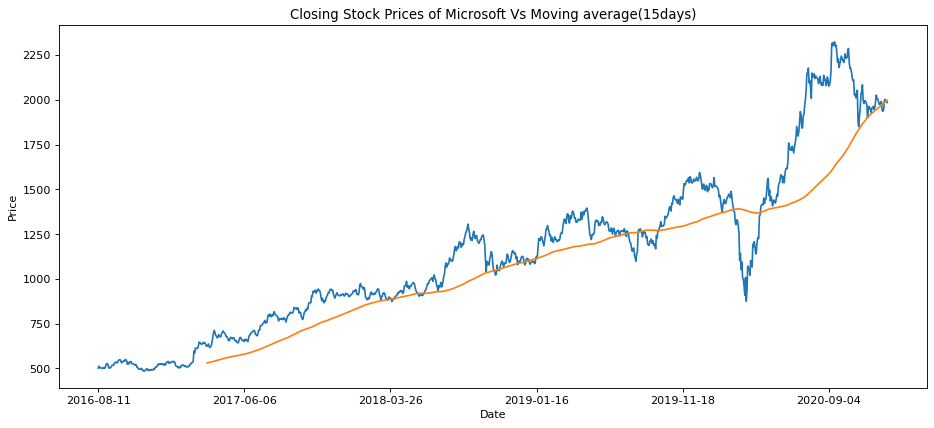

In [35]:
# Creating a visualization on 15 Days moving average
figure(figsize=(14, 6), dpi=80)

fsdata['Close'].plot()
fsdata.rolling(window = 150).mean()['Close'].plot()

# plt.legend()
plt.title("Closing Stock Prices of Microsoft Vs Moving average(15days)")
plt.xlabel("Date")
plt.ylabel("Price")

# Data Preparation for Modelling

In [36]:
# dropping nulls
fsdata = fsdata.dropna()

In [37]:
fsdata.columns

Index(['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High',
       'Low', 'Volume'],
      dtype='object')

In [38]:
cols = ['Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High','Low', 'Volume']
len(cols)

8

In [39]:
features= fsdata.iloc[:,1:]
features

,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
Date,,,,,,,,
2016-08-11,-0.9999,0.159,0.750,0.091,496.270844,506.622711,495.106873,6539201.0
2016-08-12,-0.9999,0.138,0.779,0.083,503.725189,516.553589,503.725189,7552641.0
2016-08-16,-0.9511,0.117,0.764,0.119,513.259827,517.494690,502.982239,6169134.0
2016-08-17,-0.9999,0.147,0.759,0.094,507.241852,509.569794,498.871185,7147050.0
2016-08-18,-0.9990,0.142,0.734,0.125,503.229889,507.018982,503.229889,3576481.0
...,...,...,...,...,...,...,...,...
2020-12-24,-0.9971,0.082,0.854,0.064,1947.000000,1998.800049,1945.900024,9588577.0
2020-12-28,-0.9997,0.126,0.790,0.084,2006.699951,2018.000000,1995.300049,7947719.0
2020-12-29,-0.9998,0.136,0.774,0.090,2009.000000,2012.300049,1982.550049,8589407.0


In [40]:
target = fsdata.iloc[:,:1]
target

,Close
Date,
2016-08-11,502.288818
2016-08-12,513.036926
2016-08-16,507.638092
2016-08-17,501.892548
2016-08-18,504.245270
...,...
2020-12-24,1994.150024
2020-12-28,2003.300049
2020-12-29,1990.050049


# Scaling the data to manage the sensitivity of LSTM Model. 
# Applying the MinMaxScaler

In [41]:
# Importing Libraries for Data Preprocessing
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [42]:
# scaling the feature dataset
scaler_features = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(features).reshape((len(features) ,len(cols)))
x = scaler_features.fit_transform(x)

# scaling the target variable
scaler_target = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (target).reshape ((len( target), 1))
y = scaler_target.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.99989998,  0.37007874, -0.68345324, ..., -0.98409357,
         -0.96272998, -0.83755675],
        [-0.99989998,  0.03937008, -0.26618705, ..., -0.97351564,
         -0.95341247, -0.80615766],
        [-0.95109022, -0.29133858, -0.48201439, ..., -0.97251323,
         -0.95421569, -0.84902242],
        ...,
        [-0.99979996,  0.00787402, -0.3381295 , ...,  0.61968632,
          0.64538938, -0.77403586],
        [-0.99979996, -0.1496063 , -0.00719424, ...,  0.61425393,
          0.63782147, -0.72496781],
        [-0.99959992, -0.18110236, -0.20863309, ...,  0.61926023,
          0.64111884, -0.77161584]]),
 array([[-0.98043286],
        [-0.96875182],
        [-0.97461927],
        ...,
        [ 0.63646552],
        [ 0.64238852],
        [ 0.63130322]]))

# Splitting dataset into train and test split, in time-series analysis it cannot be separated by train-test split method as it is date dependent.

In [43]:
training_size=int(len(x)*0.70)
test_size=len(x)-training_size

In [44]:
training_size,test_size

(756, 325)

# Separating Train and test data features and target.

In [45]:
X_train = x[0:training_size,:]
X_test = x[training_size:len(x),:]
y_train = y[0:training_size,:]
y_test = y[training_size:len(x),:]

In [46]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((756, 8), (756, 1), (325, 8), (325, 1))

In [47]:
X_train

array([[-0.99989998,  0.37007874, -0.68345324, ..., -0.98409357,
        -0.96272998, -0.83755675],
       [-0.99989998,  0.03937008, -0.26618705, ..., -0.97351564,
        -0.95341247, -0.80615766],
       [-0.95109022, -0.29133858, -0.48201439, ..., -0.97251323,
        -0.95421569, -0.84902242],
       ...,
       [-0.99979996, -0.00787402, -0.3381295 , ..., -0.25200179,
        -0.22777126, -0.5690317 ],
       [-0.99969994, -0.00787402, -0.38129496, ..., -0.2436133 ,
        -0.22000658, -0.7113577 ],
       [-0.99709942, -0.52755906,  0.15107914, ..., -0.22694191,
        -0.21791822, -0.70862193]])

In [48]:
y_train

array([[-0.98043286],
       [-0.96875182],
       [-0.97461927],
       [-0.98086353],
       [-0.97830659],
       [-0.98000223],
       [-0.98164404],
       [-0.98239768],
       [-0.97698776],
       [-0.98118651],
       [-0.97300437],
       [-0.95709771],
       [-0.95227995],
       [-0.95572502],
       [-0.97230458],
       [-0.9808366 ],
       [-0.97731077],
       [-0.97852191],
       [-0.97004376],
       [-0.96404172],
       [-0.96299206],
       [-0.96393406],
       [-0.95303356],
       [-0.94735453],
       [-0.94366714],
       [-0.9480812 ],
       [-0.94913086],
       [-0.94014134],
       [-0.93268592],
       [-0.93031743],
       [-0.92854103],
       [-0.93922621],
       [-0.9490232 ],
       [-0.9429674 ],
       [-0.93919928],
       [-0.93615792],
       [-0.9398991 ],
       [-0.92837951],
       [-0.92934844],
       [-0.93615792],
       [-0.95725917],
       [-0.94622408],
       [-0.95537511],
       [-0.94436696],
       [-0.94100261],
       [-0

In [49]:
X_test

array([[-0.99389878, -0.4488189 , -0.09352518, ..., -0.22272134,
        -0.1987477 , -0.87218096],
       [-0.99979996,  0.1496063 , -0.4676259 , ..., -0.2153352 ,
        -0.18873405, -0.86674793],
       [-0.99929986, -0.27559055, -0.03597122, ..., -0.21486049,
        -0.20672644, -0.87029247],
       ...,
       [-0.99979996,  0.00787402, -0.3381295 , ...,  0.61968632,
         0.64538938, -0.77403586],
       [-0.99979996, -0.1496063 , -0.00719424, ...,  0.61425393,
         0.63782147, -0.72496781],
       [-0.99959992, -0.18110236, -0.20863309, ...,  0.61926023,
         0.64111884, -0.77161584]])

In [50]:
y_test

array([[-2.10506289e-01],
       [-1.97371827e-01],
       [-2.23263847e-01],
       [-2.06845769e-01],
       [-2.22833213e-01],
       [-2.37151984e-01],
       [-2.28269998e-01],
       [-2.56961269e-01],
       [-1.75893737e-01],
       [-1.92204089e-01],
       [-1.49678676e-01],
       [-1.48763546e-01],
       [-1.30192299e-01],
       [-1.17003975e-01],
       [-9.20269528e-02],
       [-1.21471899e-01],
       [-1.14850806e-01],
       [-1.18026829e-01],
       [-1.15873528e-01],
       [-1.00101534e-01],
       [-5.91909305e-02],
       [-7.01183608e-02],
       [-6.43046728e-02],
       [-5.76835796e-02],
       [-4.88555876e-02],
       [-2.28558427e-02],
       [-1.48534484e-03],
       [-3.85396272e-03],
       [-2.72699056e-02],
       [ 2.01542001e-02],
       [ 1.45019660e-02],
       [ 5.30979470e-02],
       [ 6.60709548e-02],
       [ 5.01911024e-02],
       [ 4.21705167e-02],
       [ 4.29779208e-02],
       [ 3.18351738e-02],
       [ 1.84853953e-02],
       [ 4.4

In [51]:

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (756, 8) and y: (756, 1)
Number of rows and columns in the Test set X: (325, 8) and y: (325, 1)


# Reshape input to be [samples, time steps, features] which is required for LSTM

In [52]:
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)
print('Shape of Training set y:', y_train.shape)
print('Shape of Test set y:', y_test.shape)

Shape of Training set X: (756, 8, 1)
Shape of Test set X: (325, 8, 1)
Shape of Training set y: (756, 1)
Shape of Test set y: (325, 1)


In [53]:
# Importing Libraries for Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation


In [54]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2000)

In [55]:
# Setting model architecture and compiling it
model=Sequential()
model.add(LSTM(150,return_sequences=True,input_shape=(len(cols),1)))
model.add(Dropout(0.2))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 150)            91200     
_________________________________________________________________
dropout (Dropout)            (None, 8, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 150)            180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [56]:
# fitting the model using the training dataset
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
12/12 [==============================] - 3s 234ms/step - loss: 0.1471 - val_loss: 0.3683
Epoch 2/100
12/12 [==============================] - 1s 62ms/step - loss: 0.0694 - val_loss: 0.5459
Epoch 3/100
12/12 [==============================] - 1s 61ms/step - loss: 0.0490 - val_loss: 0.3981
Epoch 4/100
12/12 [==============================] - 1s 61ms/step - loss: 0.0330 - val_loss: 0.2337
Epoch 5/100
12/12 [==============================] - 1s 61ms/step - loss: 0.0174 - val_loss: 0.1120
Epoch 6/100
12/12 [==============================] - 1s 61ms/step - loss: 0.0104 - val_loss: 0.0503
Epoch 7/100
12/12 [==============================] - 1s 61ms/step - loss: 0.0103 - val_loss: 0.0772
Epoch 8/100
12/12 [==============================] - 1s 60ms/step - loss: 0.0073 - val_loss: 0.0735
Epoch 9/100
12/12 [==============================] - 1s 60ms/step - loss: 0.0064 - val_loss: 0.0594
Epoch 10/100
12/12 [==============================] - 1s 62ms/step - loss: 0.0066 - val_loss: 0.059

In [57]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [58]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [59]:
train_predict

array([[-0.97483623],
       [-0.9882636 ],
       [-0.9865346 ],
       [-0.9761518 ],
       [-0.9751721 ],
       [-0.9908042 ],
       [-0.9906024 ],
       [-1.0066769 ],
       [-0.998734  ],
       [-0.9795304 ],
       [-0.9802616 ],
       [-0.96256274],
       [-0.9685448 ],
       [-0.9600761 ],
       [-0.9529413 ],
       [-0.9752836 ],
       [-0.9831726 ],
       [-0.9875447 ],
       [-0.9847991 ],
       [-0.97656494],
       [-0.9643179 ],
       [-0.9611386 ],
       [-0.9557785 ],
       [-0.9348234 ],
       [-0.9559502 ],
       [-0.9775354 ],
       [-0.9571408 ],
       [-0.940342  ],
       [-0.94421965],
       [-0.9175503 ],
       [-0.93618214],
       [-0.94511116],
       [-0.94711095],
       [-0.9551183 ],
       [-0.9473042 ],
       [-0.9375523 ],
       [-0.9485467 ],
       [-0.9324448 ],
       [-0.94103456],
       [-0.938506  ],
       [-0.93119   ],
       [-0.9653443 ],
       [-0.9579471 ],
       [-0.96491635],
       [-0.93943197],
       [-0

In [60]:
test_predict

array([[-2.36171201e-01],
       [-2.09967405e-01],
       [-2.24732265e-01],
       [-2.21147940e-01],
       [-2.21012726e-01],
       [-2.36283556e-01],
       [-2.37104729e-01],
       [-2.49181047e-01],
       [-1.58354357e-01],
       [-1.68651313e-01],
       [-1.38292536e-01],
       [-1.51685774e-01],
       [-1.29515380e-01],
       [-1.31044045e-01],
       [-1.00626901e-01],
       [-1.09073654e-01],
       [-1.52935907e-01],
       [-1.16713330e-01],
       [-1.36697471e-01],
       [-1.13968924e-01],
       [-5.28925657e-02],
       [-8.07356536e-02],
       [-8.90637189e-02],
       [-7.99197406e-02],
       [-6.35098070e-02],
       [-5.33912033e-02],
       [ 2.57566571e-04],
       [ 8.75729695e-03],
       [-2.48129629e-02],
       [-1.32116508e-02],
       [-3.43226381e-02],
       [ 2.52818130e-02],
       [ 2.68405192e-02],
       [ 4.67278846e-02],
       [ 3.94826755e-03],
       [ 2.30465345e-02],
       [ 1.28868669e-02],
       [-4.18348238e-03],
       [ 4.8

In [61]:
##Transformback to original form
train_predict=scaler_target.inverse_transform(np.array(train_predict).reshape((len(train_predict),1)))
test_predict=scaler_target.inverse_transform(np.array(test_predict).reshape((len(test_predict),1)))


In [62]:
# printing the predictions
print('Train Predictions:')
train_predict[0:5]


Train Predictions:


array([[507.43845],
       [495.08347],
       [496.6744 ],
       [506.22794],
       [507.1294 ]], dtype=float32)

In [63]:
print('Test Predictions:')
test_predict[0:5]

Test Predictions:


array([[1187.1084],
       [1211.2194],
       [1197.6338],
       [1200.9318],
       [1201.0562]], dtype=float32)

In [64]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

325/325 [==============================] - 1s 3ms/step - loss: 0.0083
Train Loss = 0.0003
Test Loss = 0.0083


In [65]:
import math
from sklearn.metrics import mean_squared_error

In [66]:
# calculating root mean squared error
train_root_mean_square_error = math.sqrt(mean_squared_error(y_train,train_predict))
print('Training Root Mean Square Error =',train_root_mean_square_error)

Training Root Mean Square Error = 954.4861867164946


In [67]:
# calculating root mean squared error
test_root_mean_square_error = math.sqrt(mean_squared_error(y_test, test_predict))
print('Testing Root Mean Square Error =',test_root_mean_square_error)

Testing Root Mean Square Error = 1662.2179856324092


In [68]:
# unscaling the test feature dataset, x_test
X_test = scaler_features.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_target.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_target.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

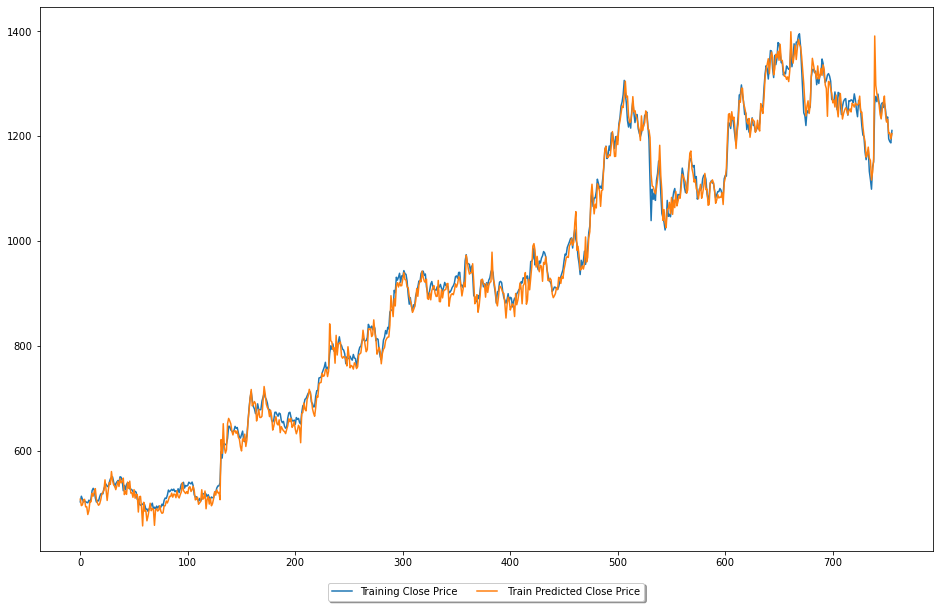

In [69]:
# plotting
plt.figure(figsize=(16,10))

plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(train_predict, label=" Train Predicted Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

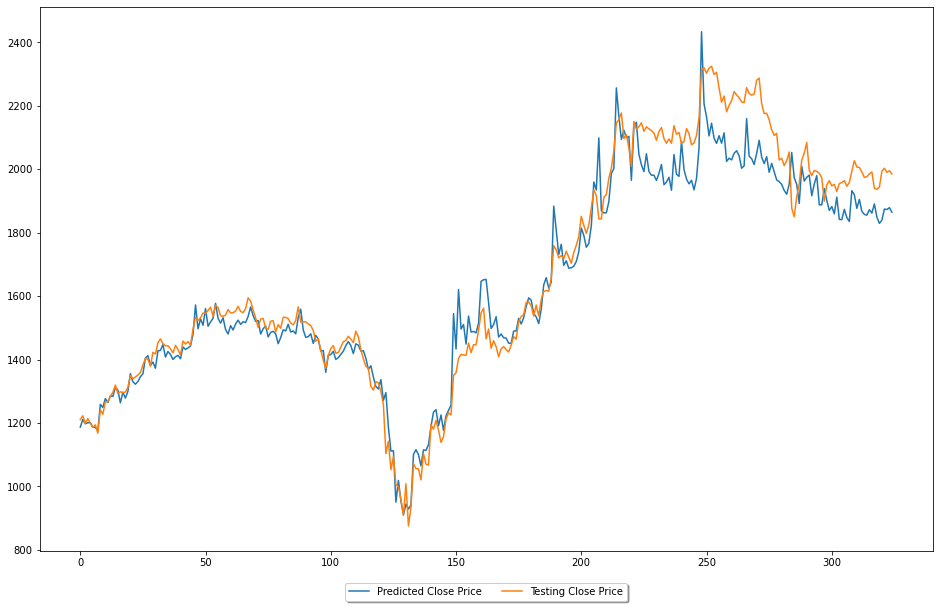

In [70]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(test_predict, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()